<a href="https://colab.research.google.com/github/imanekn/Fake-News-Detection/blob/main/FND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import string
import re
import nltk

In [2]:
data = pd.read_excel('Data-FakeRealCOVID.xlsx')

In [3]:
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


### **Exploring Data**


In [4]:
data.describe()

,id
count,6420.000000
mean,3210.500000
std,1853.438696
min,1.000000
25%,1605.750000
50%,3210.500000
75%,4815.250000
max,6420.000000


In [5]:
#Check if there are any missing values
data.isna().sum()

id       0
tweet    0
label    0
dtype: int64

### **Plotting**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(6,5)})

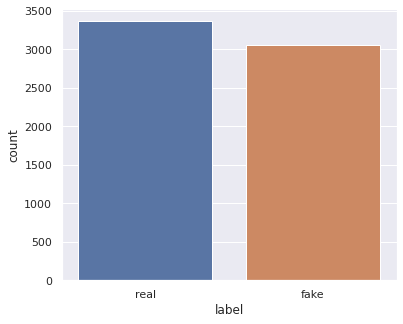

In [7]:
sns.countplot(x='label', data=data)

### **Cleaning Data**

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer

In [10]:
port_stem = PorterStemmer()

In [11]:
def preprocess(text):
  lemmatizer = WordNetLemmatizer()
  port_stem = PorterStemmer()
  stop_words = stopwords.words('english')
  text = text.lower()
  text = re.sub(r'https\S+', '', text, flags=re.MULTILINE)
  text = re.sub(r'@\S+', '', text, flags=re.MULTILINE)
  text = re.sub(r'#\S+', '', text, flags=re.MULTILINE)
  
  text = text.translate(str.maketrans('', '', string.punctuation))
  
  text = re.sub('[^a-zA-Z]+', ' ', text) 
  
  #text = [lemmatizer.lemmatize(word) for word in text.split() if not word in stopwords.words('english') and len(word)>2]
  text = [port_stem.stem(word) for word in text.split() if not word in stopwords.words('english') and len(word)>2]
  text = ' '.join(text)
  
  return text

In [12]:
def data_preprocess(x):
  x = x.apply(lambda x : preprocess(x))

  y = x.copy(deep=True)
  for i in range(y.shape[0]):
    y[i] = "".join(x[i])

  return y

In [13]:
data = pd.read_excel('Data-FakeRealCOVID.xlsx')

In [14]:
preprocess("https/hgjjfdnkjgn #imane @imane , I read a book with 7 pages")

'read book page'

In [15]:
data["tweet"] = data_preprocess(data["tweet"])
data["tweet"]

0       cdc current report death gener discrep death c...
1       state report death small rise last tuesday sou...
2       polit correct woman almost use pandem excus re...
3                  test laboratori india august test done
4       popul state gener larg case count look new cas...
                              ...                        
6415      tiger test posit covid pleas stay away pet bird
6416    autopsi prove covid blood clot pneumonia ought...
6417    post claim covid vaccin alreadi develop caus w...
6418                    aamir khan donat relief care fund
6419    day sinc last case covid acquir local unknown ...
Name: tweet, Length: 6420, dtype: object

In [16]:
#Loading preprocessed data
data.to_csv("Data-FakeRealCOVID1.csv", index=False)

### **Features Extraction**

In [17]:
df = pd.read_csv("/content/Data-FakeRealCOVID1.csv")

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [19]:
df[df.isnull().any(axis=1)]

,id,tweet,label
4286,4287,NaN,fake
4697,4698,NaN,fake


In [20]:
df = df.dropna()

In [21]:
X = df['tweet']
Y = df['label']

In [22]:
df["label"].replace({"real": 1, "fake": 0}, inplace=True)

In [23]:
tfidf_vectorizer = TfidfVectorizer() 
X = tfidf_vectorizer.fit_transform(X).toarray()


In [24]:
label = Y.to_numpy()
label

array([1, 1, 0, ..., 0, 0, 1])

In [25]:
array = np.c_[X, label]

In [26]:
features_names = tfidf_vectorizer.get_feature_names() + ['label']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
df1 = pd.DataFrame(array, index=[0+i for i in range(6418)], columns=features_names)

In [28]:
df1.to_csv('features.csv' , index=False)

### **Model**

In [29]:
df = pd.read_csv('features.csv')

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

In [31]:
data = torch.tensor(df.to_numpy())

In [32]:
data

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4864, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000]],
       dtype=torch.float64)

In [33]:
df.head()

,aaj,aamir,aamp,aaradhya,ababa,abacha,abakaliki,abandon,abat,abbasi,abbott,abbrevi,abc,abdic,abdul,abdulaziz,abhigyan,abhishek,abia,abid,abil,abl,abnorm,aboard,abort,abou,abound,aboveinfl,aboveremain,abraham,abruptli,abscbn,absenc,absent,absente,absolut,absorb,abt,abubakar,abuja,...,yojanapmsbi,york,yorker,yorkshir,youll,young,younger,your,youtc,youth,youtub,youv,yvonn,zack,zambal,zambia,zamfara,zanzibar,zaria,zealand,zee,zekiri,zero,zhong,zhoushan,ziberi,zika,zinc,zithromax,zomato,zombi,zone,zonecityspecif,zoo,zookeep,zoolog,zoom,zydu,zyphr,label.1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
y = df.pop('label.1')
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
6413    0.0
6414    0.0
6415    0.0
6416    0.0
6417    1.0
Name: label.1, Length: 6418, dtype: float64

In [35]:
targets = torch.tensor(y)
targets

tensor([1., 1., 0.,  ..., 0., 0., 1.], dtype=torch.float64)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(data,targets,test_size=0.2)

In [37]:
X_train.shape

torch.Size([5134, 7943])

In [38]:
X_test.shape

torch.Size([1284, 7943])

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [40]:
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
X_val = torch.tensor(X_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
X_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]], dtype=torch.float64)

In [42]:
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)
y_val = torch.tensor(y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
y_train = y_train.to(torch.float32)
y_test = y_test.to(torch.float32)
y_val = y_val.to(torch.float32)


In [44]:
# Créer une classe qui hérite de Dataset et redéfinit les méthodes comme susmentionné
class MyDataset(Dataset):
    def __init__(self, data, targets):
        super(MyDataset, self)
        self.data = data
        self.targets = targets
        
    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]
    def __len__(self):
        return len(self.targets)

In [45]:
train_dataset = MyDataset(X_train,y_train)
val_dataset = MyDataset(X_val,y_val)
test_dataset = MyDataset(X_test,y_test)

In [46]:
batch_size = 64

In [47]:
from torch.utils.data import DataLoader

In [48]:
train_Dataloader = DataLoader(train_dataset , batch_size)
val_Dataloader = DataLoader(val_dataset , batch_size)
test_Dataloader = DataLoader(test_dataset , batch_size)

In [49]:
len(train_Dataloader.dataset)

3850

In [50]:
class MyNN(nn.Module):
  def __init__(self):
    super(MyNN,self).__init__()
    self.input_layer = nn.Linear(7943, 64)
    self.hidden_layer = nn.Linear(64,32)
    self.output_layer = nn.Linear(32,1)
    
  def forward(self, x):
    x = F.relu(self.input_layer(x))
    x = F.relu(self.hidden_layer(x))
    return torch.sigmoid(self.output_layer(x))
 

In [51]:
#MyNN = nn.Sequential(nn.Linear(train_data.shape[1], 64),nn.ReLU(),nn.Linear(64, 2))

In [52]:
model = MyNN()

In [53]:
# Loss Function
loss_function = nn.CrossEntropyLoss()

In [54]:
import torch.optim as optim

In [55]:
# Définir une fonction d'optimisation des coût, On choisira 0.001 pour le learning rate.
#optimizer = optim.Adadelta(model.parameters(), lr=100)
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [56]:
epochs = 5

In [57]:
'''
# on essaye pour le premier
losses_train = []
losses_val = []
# mode train

for i in range(epochs):
    # erreur dand tout l'epoch
    loss = 0
    model.train()
    # pour chacun des batches
    for data_ , targets_ in train_Dataloader:
        # on va réinitialiser l'optimisateur
        optimizer.zero_grad()
        # on calcule les prédictions de nos données du batch
        pred = model(data_.float())
        # on calcule la moyenne des erreurs
        erreur = loss_function(pred,targets_.reshape(-1,1))
        # on a calculer l'erreur y-ÿ et ÿ est en fonction des wi 
        # on fait la backpropagation qui va calculer d(erreur)/d(wi)   avec un chainnage de dérivée d(erreur)/d(an)*d(an)/d(a(n-1))*...*d(a(n-r))/d(z(n-r))*d(z(n-r))/wi 
        # ce chainage (tracé) pendant la forward propagation pour calculer l'erreur
        erreur.backward()
        # cette backpropagation va donc nos donner nos gradients d(erreur)/d(wi)
        # on va utiliser ces gradients pour calculer les nouveaux weights
        # wi = wi-rate*gradient     (gradient = d(erreur)/d(wi))
        # cette etape est faite par l'optimisateur
        optimizer.step()
        loss+=erreur.item()
    losses_train.append(loss/len(X_train))
    model.eval()
    loss=0
    target_size = 0
    # on arrete de traquer les changements pour le calcul du gradient
    with torch.no_grad():
        for data_,targets_ in val_Dataloader:
            pred = model(data_.float())
            for t in range(len(pred)):
                print(pred[t], " ",targets_[t])
            erreur = loss_function(pred,targets_.reshape(-1,1))
            loss+=erreur.item()
            print(loss)
        losses_val.append(loss/len(X_val))
        '''

'\n# on essaye pour le premier\nlosses_train = []\nlosses_val = []\n# mode train\n\nfor i in range(epochs):\n    # erreur dand tout l\'epoch\n    loss = 0\n    model.train()\n    # pour chacun des batches\n    for data_ , targets_ in train_Dataloader:\n        # on va réinitialiser l\'optimisateur\n        optimizer.zero_grad()\n        # on calcule les prédictions de nos données du batch\n        pred = model(data_.float())\n        # on calcule la moyenne des erreurs\n        erreur = loss_function(pred,targets_.reshape(-1,1))\n        # on a calculer l\'erreur y-ÿ et ÿ est en fonction des wi \n        # on fait la backpropagation qui va calculer d(erreur)/d(wi)   avec un chainnage de dérivée d(erreur)/d(an)*d(an)/d(a(n-1))*...*d(a(n-r))/d(z(n-r))*d(z(n-r))/wi \n        # ce chainage (tracé) pendant la forward propagation pour calculer l\'erreur\n        erreur.backward()\n        # cette backpropagation va donc nos donner nos gradients d(erreur)/d(wi)\n        # on va utiliser ces g

In [58]:
 '''
 for i in range(epochs):
  model.train()
  train_loss = 0.0
  for data_, targets_ in train_Dataloader :

    data = data.float()
    print(data.dtype)
    pred_targets = model(torch.flatten(data, start_dim=1))
    loss = loss_function(pred_targets, targets_.long())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

    train_loss /= len(train_Dataloader)

    # boucle de validation:
    valid_loss = 0
    correct = 0
    

    model.eval()

    with torch.no_grad :
      for data, targets in val_Dataloader :
        pred_targets = model(torch.flatten(data, start_dim=1))
        loss = loss_function(pred_targets, targets)
        valid_loss += loss.item()
        correct += torch.sum(torch.argmax(pred_targets, dim=1) == targets).item()

      valid_loss /= len(val_Dataloader)

      correct /= len(val_Dataloader.dataset)

    print(f"epoch: {i}, train loss: {train_loss:.4f}, validation loss: {valid_loss:.4f}, correct predictions: {correct*100:.2f}%")

'''

'\nfor i in range(epochs):\n model.train()\n train_loss = 0.0\n for data_, targets_ in train_Dataloader :\n\n   data = data.float()\n   print(data.dtype)\n   pred_targets = model(torch.flatten(data, start_dim=1))\n   loss = loss_function(pred_targets, targets_.long())\n   optimizer.zero_grad()\n   loss.backward()\n   optimizer.step()\n   train_loss += loss.item()\n\n   train_loss /= len(train_Dataloader)\n\n   # boucle de validation:\n   valid_loss = 0\n   correct = 0\n   \n\n   model.eval()\n\n   with torch.no_grad :\n     for data, targets in val_Dataloader :\n       pred_targets = model(torch.flatten(data, start_dim=1))\n       loss = loss_function(pred_targets, targets)\n       valid_loss += loss.item()\n       correct += torch.sum(torch.argmax(pred_targets, dim=1) == targets).item()\n\n     valid_loss /= len(val_Dataloader)\n\n     correct /= len(val_Dataloader.dataset)\n\n   print(f"epoch: {i}, train loss: {train_loss:.4f}, validation loss: {valid_loss:.4f}, correct predictions: 

In [61]:
def training_model(epochs):
  for i in range(epochs):
    model.train()
    train_loss = 0.0
    for data_, targets_ in train_Dataloader :
      
      pred_targets = (data_.float())
      loss = loss_function(pred_targets,targets_.reshape(-1,1))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      train_loss += loss.item()
    
    train_loss /= len(train_Dataloader)

    # boucle de validation:
    valid_loss = 0
    correct = 0
    

    model.eval()

    with torch.no_grad :
      for data_, targets_ in val_Dataloader :
        pred_targets = model(data_.float())
        loss = loss_function(pred_targets,targets_.reshape(-1,1))
        valid_loss += loss.item()
        correct += torch.sum(torch.argmax(pred_targets, dim=1) == targets).item()
      
      valid_loss /= len(val_Dataloader)

      correct /= len(val_Dataloader.dataset)

    print(f"epoch: {i}, train loss: {train_loss:.4f}, validation loss: {valid_loss:.4f}, correct predictions: {correct*100:.2f}%")




In [62]:
training_model(5)

RuntimeError: ignored